In [1]:
import pandas as pd
from variables import *
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

### Basic statistics

- Number of fragments

- Mean fragment length

- Fragment length distribution (histogram)

- Total sequence

#### Number of fragments:

In [68]:
results = {}
frag_number = []
mean_frag_len = []
total_seq_len = []

for pop1, pop2 in itertools.combinations(lpopulat, 2):
    data = pd.read_csv("~/GenerationInterval/people/clsj/script_results/intersection/int_HGDP_{}_Neanderthal_HGDP_{}_Neanderthal_0.5.txt".format(pop1,pop2), sep = '\t', header = None)
    df = pd.DataFrame(data)
    df.columns = ['chr','start','end','ind1','ind2']
    df['frag_len'] = df['end'] - df['start']
    frag_number.append(len(df))
    mean_frag_len.append(df['frag_len'].mean())
    total_seq_len.append(df['frag_len'].sum())

results['pop1'] = [pop1 for pop1,pop2 in itertools.combinations(lpopulat, 2)]
results['pop2'] = [pop2 for pop1,pop2 in itertools.combinations(lpopulat, 2)]
    
results['intersection'] = ['{}_{}'.format(pop1,pop2) for pop1,pop2 in itertools.combinations(lpopulat, 2)]

#results['pop1'] = [list(i)[0] for i in itertools.combinations(lpopulat[:5], 2)]
#results['pop2'] = [list(i)[1] for i in itertools.combinations(lpopulat[:5], 2)]
results['frag_number'] = frag_number
results['mean_frag_len'] = mean_frag_len
results['total_seq_len'] = total_seq_len

results = pd.DataFrame(results)
results['frag_number_thousands'] = results['frag_number'] / 1000
results['mean_frag_len_thousands'] = results['mean_frag_len'] / 1000
results

,pop1,pop2,intersection,frag_number,mean_frag_len,total_seq_len,frag_number_thousands,mean_frag_len_thousands
0,Burusho,Hazara,Burusho_Hazara,4188,52540.114613,220038000,4.188,52.540115
1,Burusho,Uygur,Burusho_Uygur,3395,55352.871870,187923000,3.395,55.352872
2,Burusho,Bougainville,Burusho_Bougainville,2026,52694.965449,106760000,2.026,52.694965
3,Burusho,PapuanHighlands,Burusho_PapuanHighlands,1591,50920.175990,81014000,1.591,50.920176
4,Burusho,PapuanSepik,Burusho_PapuanSepik,1652,51989.104116,85886000,1.652,51.989104
...,...,...,...,...,...,...,...,...
1076,Kalash,Sindhi,Kalash_Sindhi,3500,54205.142857,189718000,3.500,54.205143
1077,Kalash,Mozabite,Kalash_Mozabite,2307,53628.088427,123720000,2.307,53.628088
1078,Pathan,Sindhi,Pathan_Sindhi,4762,54142.587148,257827000,4.762,54.142587
1079,Pathan,Mozabite,Pathan_Mozabite,3007,54103.092784,162688000,3.007,54.103093


In [ ]:
flipped = flipped.rename(columns={'pop1':'pop2',
                                  'pop2':'pop1',
                                  "number_of_ind1"        : "number_of_ind2"         ,
                                  "art1_mean_frag_length" : "art2_mean_frag_length"  ,
                                  "art1_total_seq_length" : "art2_total_seq_length"  ,
                                  "art1_number_of_frags"  : "art2_number_of_frags"   ,
                                  "number_of_ind2"        : "number_of_ind1"         ,
                                  "art2_mean_frag_length" : "art1_mean_frag_length"  ,
                                  "art2_total_seq_length" : "art1_total_seq_length"  ,
                                  "art2_number_of_frags"  : "art1_number_of_frags"   })

flipped['ratio'] = flipped['int_total_seq_length']/flipped['art1_total_seq_length']
flipped

In [70]:
for pop1 in lpopulat:
    for pop2 in lpopulat:
        if '{}_{}'.format(pop1,pop2) not in results.values:
                if '{}_{}'.format(pop2,pop1) in results.values:
                    df = pd.DataFrame(results.query('intersection == "{}_{}"'.format(pop2,pop1)))
                    new_row = {'pop1':pop1,'pop2':pop2,'intersection':'{}_{}'.format(pop1,pop2),'frag_number':list(df['frag_number'])[0],'mean_frag_len':list(df['mean_frag_len'])[0],'total_seq_len':list(df['total_seq_len'])[0],'frag_number_thousands':list(df['frag_number_thousands'])[0],'mean_frag_len_thousands':list(df['mean_frag_len_thousands'])[0]}
                    results.loc[len(results)] = new_row
                else:
                    new_row = {'pop1':pop1,'pop2':pop2,'intersection':'{}_{}'.format(pop1,pop2),'frag_number':0,'mean_frag_len':0,'total_seq_len':0,'frag_number_thousands':0,'mean_frag_len_thousands':0}
                    results.loc[len(results)] = new_row
                    
results.to_csv("../script_results/tables/intersection_statistics.txt",header=0,index=False,sep='\t')
results

,pop1,pop2,intersection,frag_number,mean_frag_len,total_seq_len,frag_number_thousands,mean_frag_len_thousands
0,Burusho,Hazara,Burusho_Hazara,4188,52540.114613,220038000,4.188,52.540115
1,Burusho,Uygur,Burusho_Uygur,3395,55352.871870,187923000,3.395,55.352872
2,Burusho,Bougainville,Burusho_Bougainville,2026,52694.965449,106760000,2.026,52.694965
3,Burusho,PapuanHighlands,Burusho_PapuanHighlands,1591,50920.175990,81014000,1.591,50.920176
4,Burusho,PapuanSepik,Burusho_PapuanSepik,1652,51989.104116,85886000,1.652,51.989104
...,...,...,...,...,...,...,...,...
2204,Mozabite,Makrani,Mozabite_Makrani,2945,54415.280136,160253000,2.945,54.415280
2205,Mozabite,Kalash,Mozabite_Kalash,2307,53628.088427,123720000,2.307,53.628088
2206,Mozabite,Pathan,Mozabite_Pathan,3007,54103.092784,162688000,3.007,54.103093
2207,Mozabite,Sindhi,Mozabite_Sindhi,2928,54813.866120,160495000,2.928,54.813866


In [71]:
results['pop1']

0        Burusho
1        Burusho
2        Burusho
3        Burusho
4        Burusho
          ...   
2204    Mozabite
2205    Mozabite
2206    Mozabite
2207    Mozabite
2208    Mozabite
Name: pop1, Length: 2209, dtype: object

In [72]:
intersection_ind = {}
for pop in lpopulat:
    art_data = pd.read_csv("../script_results/artificialgenomes/art_HGDP_{}_Neanderthal_0.5.txt".format(pop), sep='\t', header=None)
    art_data.columns = ['chr', 'start', 'end', 'mean_prob', 'ind']
    intersection_ind[pop] = art_data['ind'].nunique()
    
    
for i in intersection_ind:
    for j in range(len(results)):
        if results['pop1'][j] == i:
            results['pop1'][j] = results['pop1'][j] + ' ({})'.format(intersection_ind[i])
        if results['pop2'][j] == i:
            results['pop2'][j] = results['pop2'][j] + ' ({})'.format(intersection_ind[i]) 

/scratch/18283393/ipykernel_17118/683954538.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['pop1'][j] = results['pop1'][j] + ' ({})'.format(intersection_ind[i])
/scratch/18283393/ipykernel_17118/683954538.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['pop2'][j] = results['pop2'][j] + ' ({})'.format(intersection_ind[i])


In [73]:
res = results.pivot(index='pop1',columns='pop2',values='mean_frag_len_thousands')


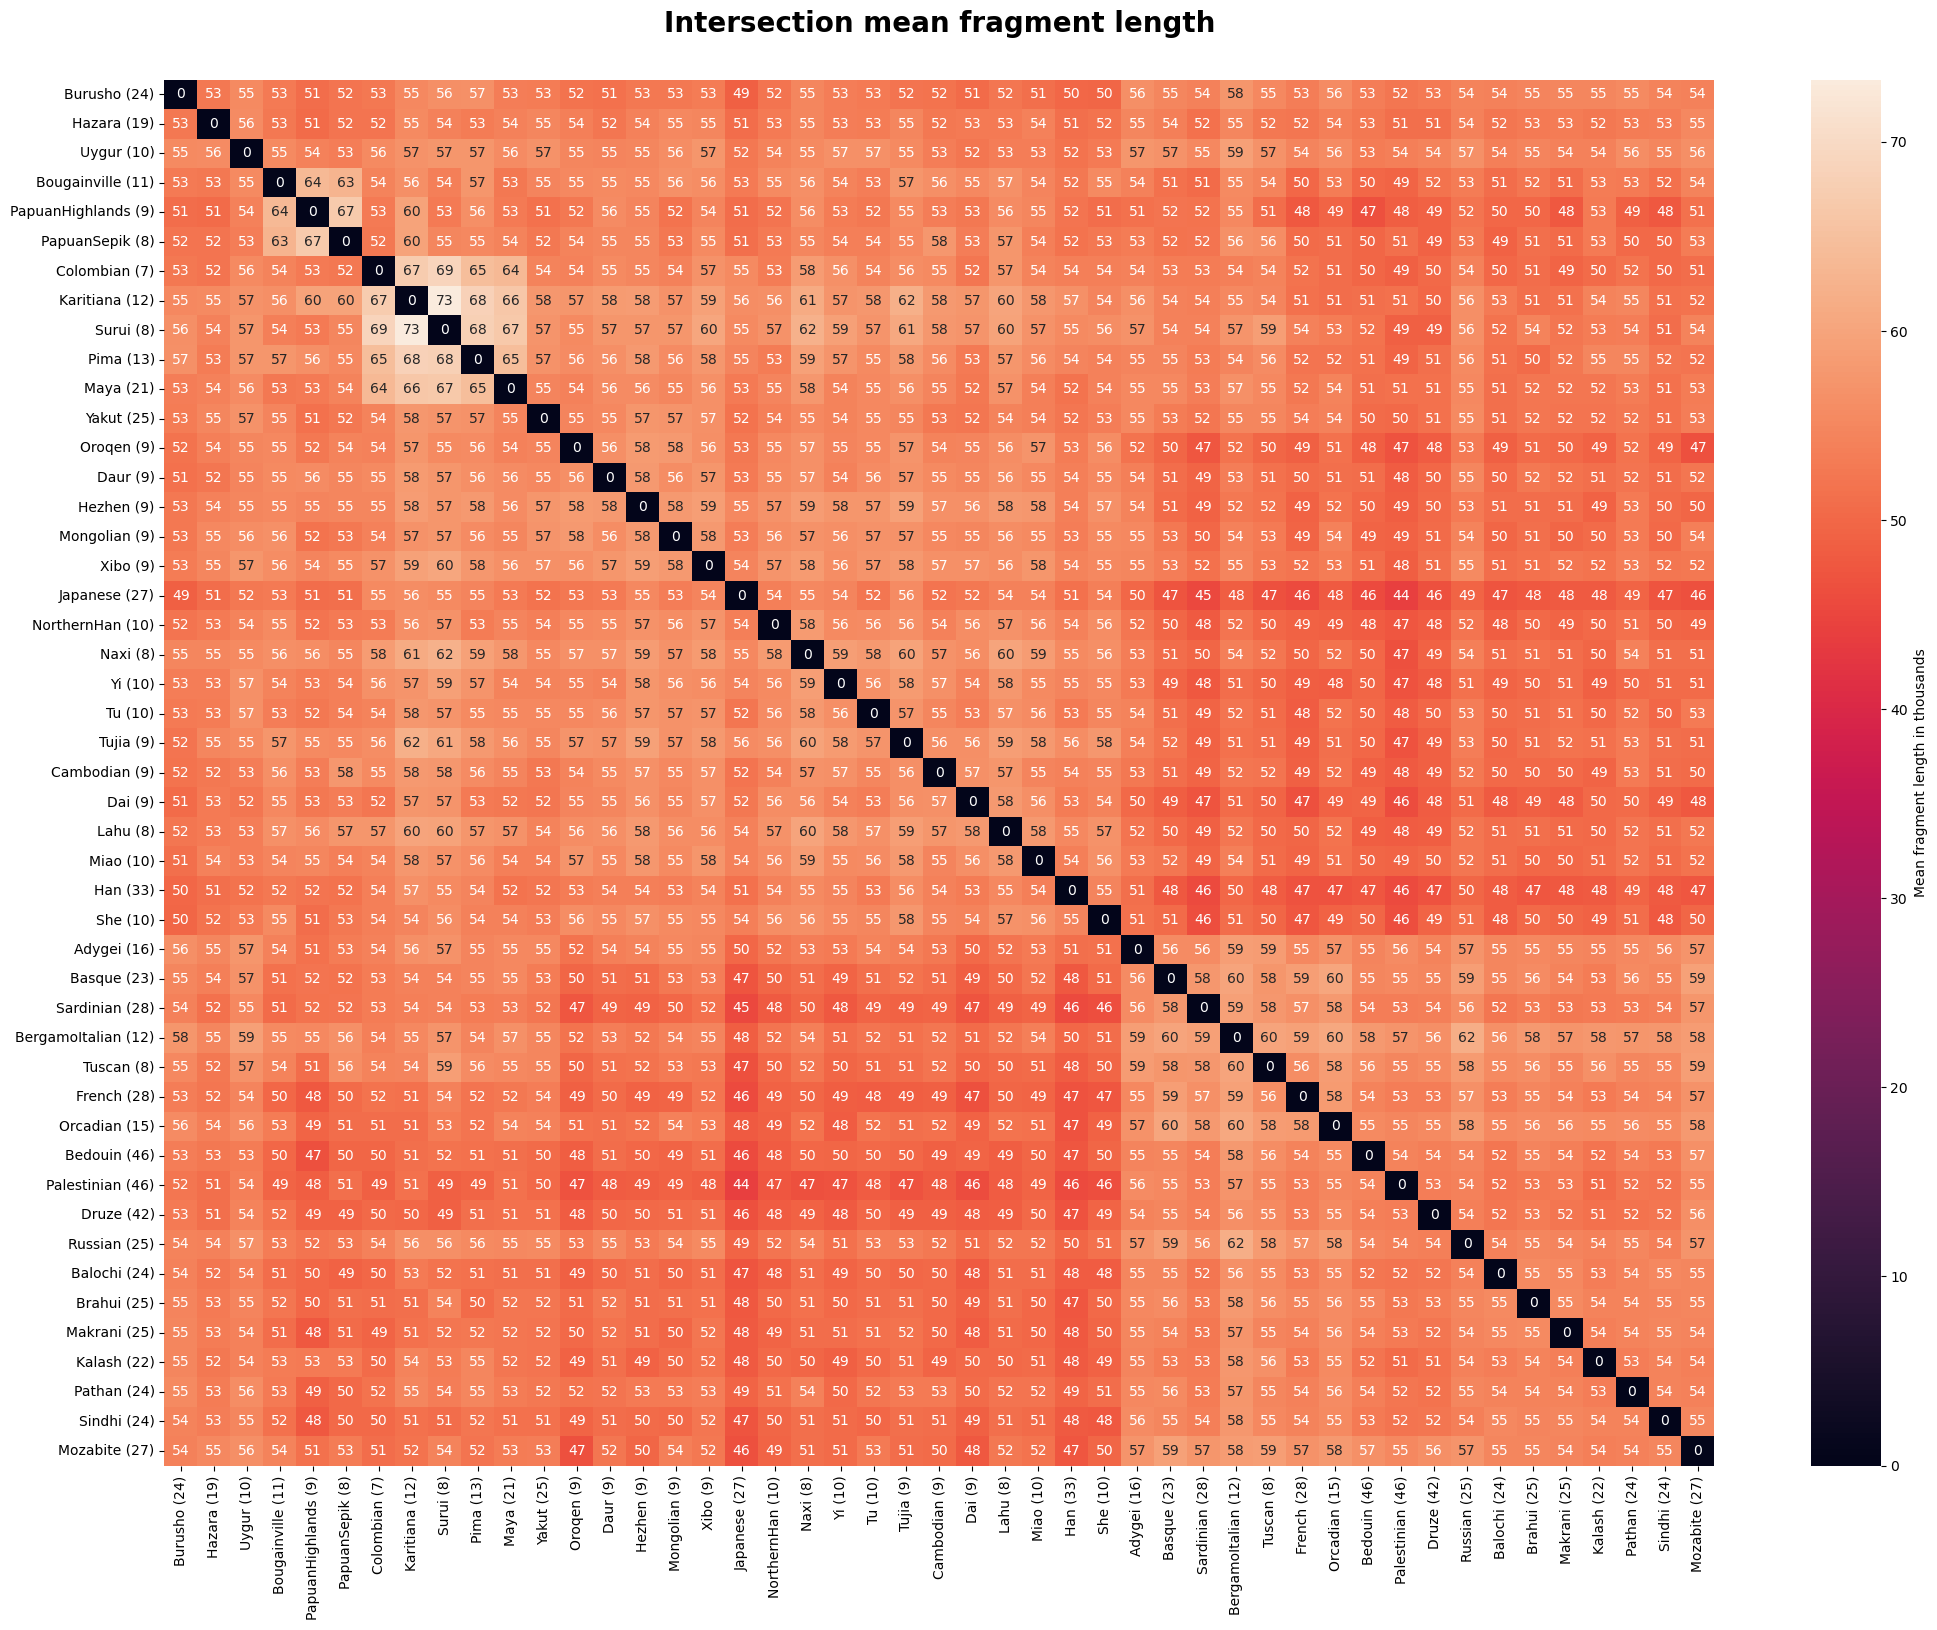

In [77]:
column_order = ['Burusho (24)','Hazara (19)','Uygur (10)','Bougainville (11)','PapuanHighlands (9)','PapuanSepik (8)','Colombian (7)','Karitiana (12)','Surui (8)','Pima (13)', 'Maya (21)','Yakut (25)','Oroqen (9)','Daur (9)','Hezhen (9)','Mongolian (9)','Xibo (9)','Japanese (27)','NorthernHan (10)','Naxi (8)','Yi (10)','Tu (10)','Tujia (9)','Cambodian (9)','Dai (9)','Lahu (8)','Miao (10)','Han (33)','She (10)','Adygei (16)','Basque (23)','Sardinian (28)','BergamoItalian (12)','Tuscan (8)','French (28)','Orcadian (15)','Bedouin (46)','Palestinian (46)','Druze (42)','Russian (25)','Balochi (24)','Brahui (25)','Makrani (25)','Kalash (22)','Pathan (24)','Sindhi (24)','Mozabite (27)']
row_order = ['Burusho (24)','Hazara (19)','Uygur (10)','Bougainville (11)','PapuanHighlands (9)','PapuanSepik (8)','Colombian (7)','Karitiana (12)','Surui (8)','Pima (13)', 'Maya (21)','Yakut (25)','Oroqen (9)','Daur (9)','Hezhen (9)','Mongolian (9)','Xibo (9)','Japanese (27)','NorthernHan (10)','Naxi (8)','Yi (10)','Tu (10)','Tujia (9)','Cambodian (9)','Dai (9)','Lahu (8)','Miao (10)','Han (33)','She (10)','Adygei (16)','Basque (23)','Sardinian (28)','BergamoItalian (12)','Tuscan (8)','French (28)','Orcadian (15)','Bedouin (46)','Palestinian (46)','Druze (42)','Russian (25)','Balochi (24)','Brahui (25)','Makrani (25)','Kalash (22)','Pathan (24)','Sindhi (24)','Mozabite (27)']

table3 = res[column_order][row_order]
table4 = table3.reindex(row_order)

fig, ax = plt.subplots(figsize=(25, 18))
heat_map = sns.heatmap(table4,linewidth = 0, annot=True,xticklabels=True,yticklabels=True, cbar_kws={'label': 'Mean fragment length in thousands'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Intersection mean fragment length', fontsize=20, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
plt.savefig("../script_results/plots/intersection_mean_frag_length.png")

<AxesSubplot: title={'center': 'Number of fragments'}, xlabel='Intersection', ylabel='Number'>

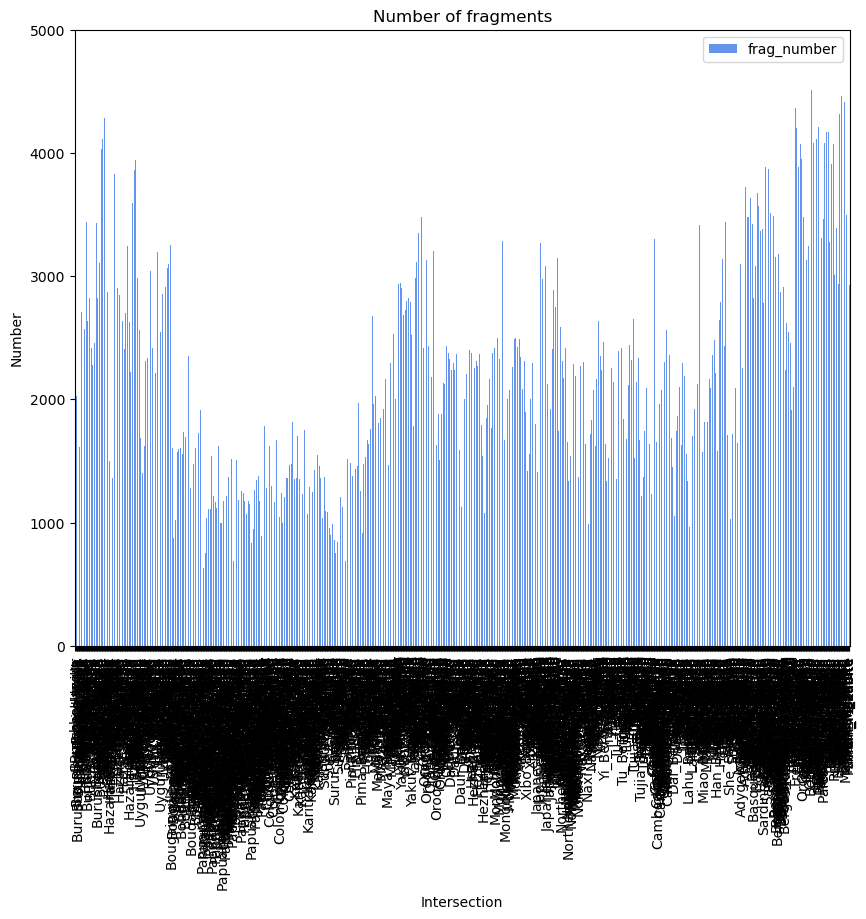

In [17]:
#results.plot(x = 'pop2', y = 'pop1', c='mean_frag_len',kind = 'scatter', title = 'Mean fragment length', xlabel = 'Intersection', ylabel = 'Basepairs', figsize = (20,10))#, color = '#CFE2F3',edgecolor='black')
results.plot(x = 'intersection', y = 'frag_number', kind = 'bar', title = 'Number of fragments', xlabel = 'Intersection', ylabel = 'Number', figsize = (10,8), color = 'cornflowerblue')
#results.plot(x = 'intersection', y = 'total_seq_len', kind = 'bar', title = 'Total sequence length', xlabel = 'Intersection', ylabel = 'Basepairs', figsize = (10,8), color = 'cornflowerblue')
